In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib as mpl
from math import ceil


# Linear Regression

In [2]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

(0.0, 2.0, 0.0, 15.0)

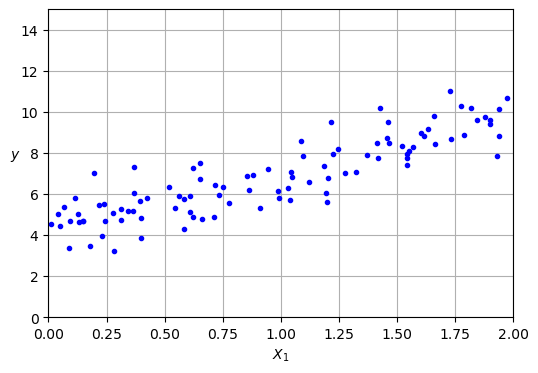

In [56]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.grid()
plt.xlabel("$X_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])

In [4]:
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [58]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [59]:
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [60]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [16]:
X_new = np.array([[0], [2], [1]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293],
       [6.98520954]])

(0.0, 2.0, 0.0, 14.0)

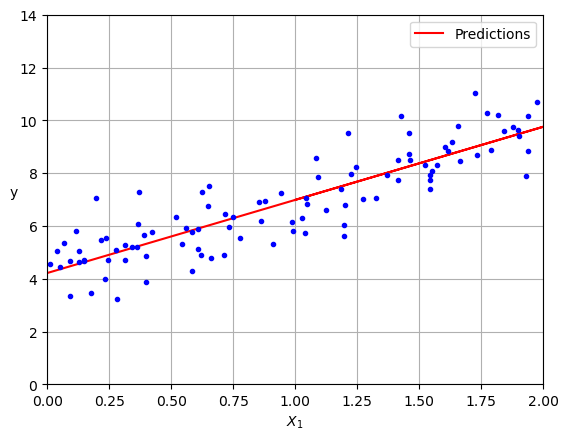

In [70]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.grid()
plt.legend()
plt.xlabel("$X_1$")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 14])

In [72]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [73]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293],
       [6.98520954]])

In [74]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [75]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

# Batch Gradient Descent

In [79]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

In [81]:
for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients

In [82]:
theta

array([[4.21509616],
       [2.77011339]])

In [149]:
def plot_gradient_descent(theta, eta):
  m = len(X_b)
  plt.plot(X, y, "b.")
  n_epochs = 1000
  n_shown = 20
  theta_path = []

  for epoch in range(n_epochs):
    if epoch < n_shown: 
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
      plt.plot(X_new, y_predict, linestyle="solid", color=color)
    gradients = 2 / m * X_b.T @ (X_b @ theta -y)
    theta = theta - eta * gradients
    theta_path.append(theta)
  plt.xlabel("$X_1$")
  plt.axis([0, 2, 0, 15])
  plt.grid()
  plt.title(fr"$\eta = {eta}$")

  return theta_path

[Text(0, 0.0, ''),
 Text(0, 2.0, ''),
 Text(0, 4.0, ''),
 Text(0, 6.0, ''),
 Text(0, 8.0, ''),
 Text(0, 10.0, ''),
 Text(0, 12.0, ''),
 Text(0, 14.0, ''),
 Text(0, 16.0, '')]

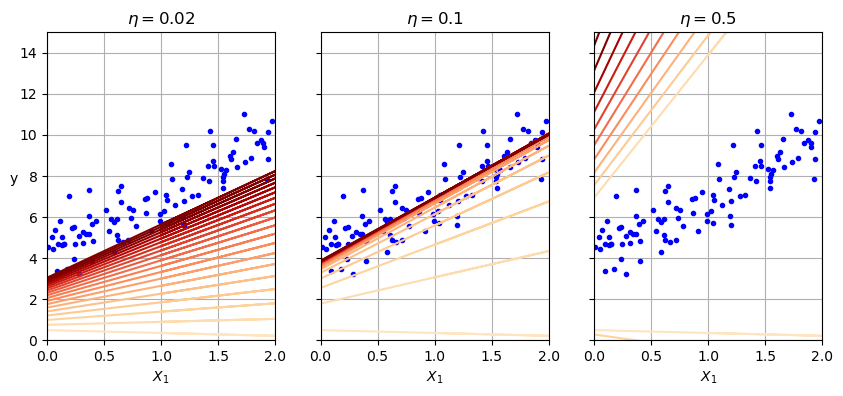

In [150]:
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
plt.subplot(131)
theta_path_bgd = plot_gradient_descent(theta, eta=0.02)
plt.ylabel("y", rotation=0)

plt.subplot(132)
plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])

plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)
plt.gca().axes.yaxis.set_ticklabels([])

# Stochastic Gradient Descent

In [5]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

In [14]:
for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index+1]
    yi = y[random_index : random_index+1]
    gradients = 2 * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients

In [15]:
theta

array([[4.20778135],
       [2.74254932]])

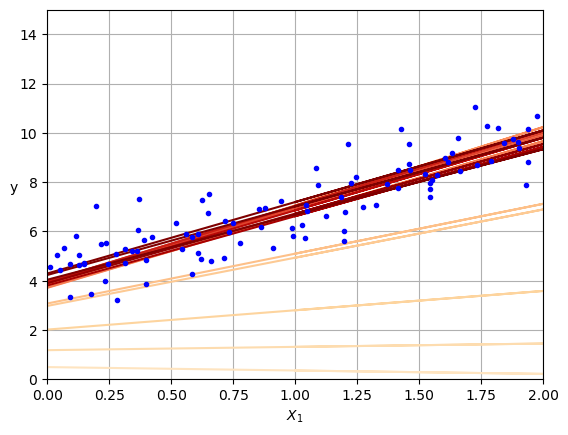

In [151]:
n_epochs = 50
t0, t1 = 5, 50
theta_path_sgd = []

def learning_schedule(t):
  return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

n_shown = 20

for epoch in range(n_epochs):
  for iteration in range(m):
    if epoch == 0 and iteration < n_shown:
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
      plt.plot(X_new, y_predict, color=color)
    
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T @ (xi@theta-yi)
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$X_1$")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

In [42]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                      n_iter_no_change=100, random_state=42)

In [43]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [44]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# Mini-Batch Gradient Descent

In [152]:
n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m/minibatch_size)
theta_path_mgd = []

np.random.seed(42)
theta = np.random.randn(2, 1)
t0, t1 = 200, 1000

def learning_schedulte(t):
  return t0 / (t+t1)

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for iteration in range(0, n_batches_per_epoch):
    idx = iteration * minibatch_size
    xi = X_b_shuffled[idx : idx+minibatch_size]
    yi = y_shuffled[idx : idx+minibatch_size]
    gradients = 2 / minibatch_size * xi.T @ (xi@theta-yi)
    eta = learning_schedule(iteration)
    theta = theta - eta * gradients

In [153]:
theta

array([[4.2857119],
       [2.8119161]])

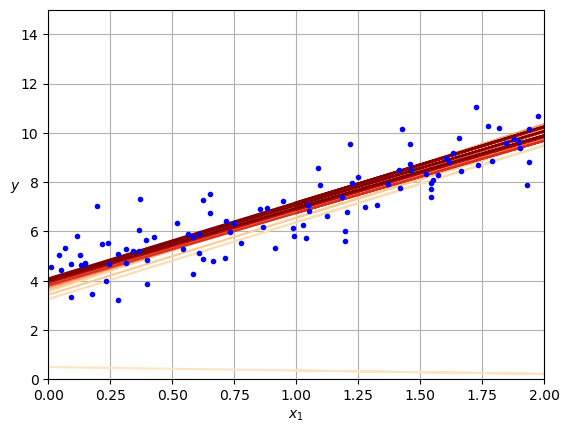

In [154]:
np.random.seed(42)
theta = np.random.randn(2, 1)
n_shown = 20
iter = 0

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  
  for iteration in range(0, n_batches_per_epoch):
    if iter < n_shown:
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(iter / n_shown + 0.15))
      plt.plot(X_new, y_predict, color=color)
      iter += 1

    idx = iteration * minibatch_size
    xi = X_b_shuffled[idx : idx+minibatch_size]
    yi = y_shuffled[idx : idx+minibatch_size]
    gradients = 2 / minibatch_size * xi.T @ (xi@theta-yi)
    eta = learning_schedule(iteration)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

In [156]:
bgd.shape

(1000, 2, 1)

In [155]:
bgd = np.array(theta_path_bgd)
sgd = np.array(theta_path_sgd)
mgd = np.array(theta_path_mgd)

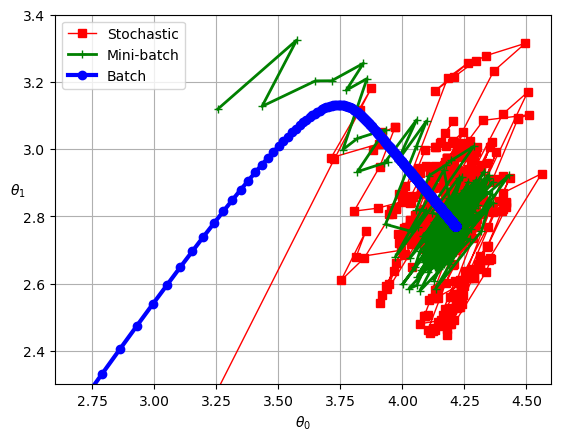

In [157]:
plt.plot(sgd[:, 0], sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(mgd[:, 0], mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(bgd[:, 0], bgd[:, 1], "b-o", linewidth=3, label="Batch")

plt.legend()
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()

# Polynomial Regression

Text(0.5, 1.0, 'Nonlinear data')

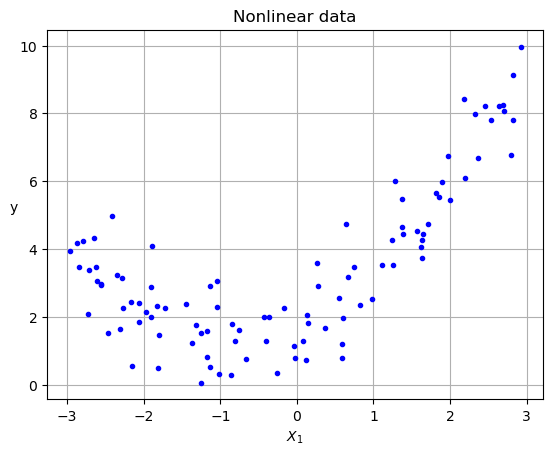

In [162]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.grid()
plt.xlabel("$X_1$")
plt.ylabel("y", rotation=0)
plt.title("Nonlinear data")

In [164]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [165]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [170]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X, y)
lin_reg1.intercept_, lin_reg1.coef_

(array([3.56401543]), array([[0.84362064]]))

In [171]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)
lin_reg2.intercept_, lin_reg2.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [174]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

y_new1 = lin_reg1.predict(X_new)
y_new2 = lin_reg2.predict(X_new_poly)

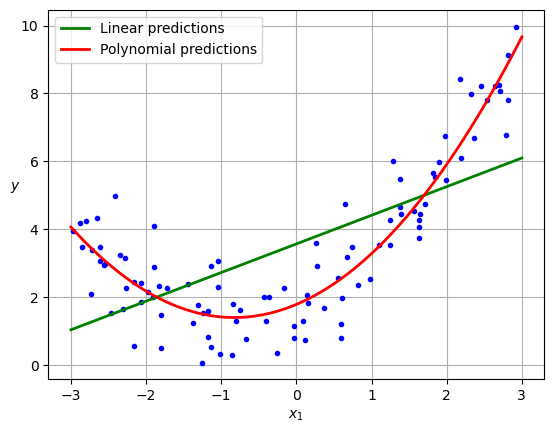

In [180]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new1, "g-", linewidth=2, label="Linear predictions")
plt.plot(X_new, y_new2, "r-", linewidth=2, label="Polynomial predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.legend()